Original cube shape: (96, 96, 200)
Reshaped data shape: (9216, 200)
PCA done
t-SNE done


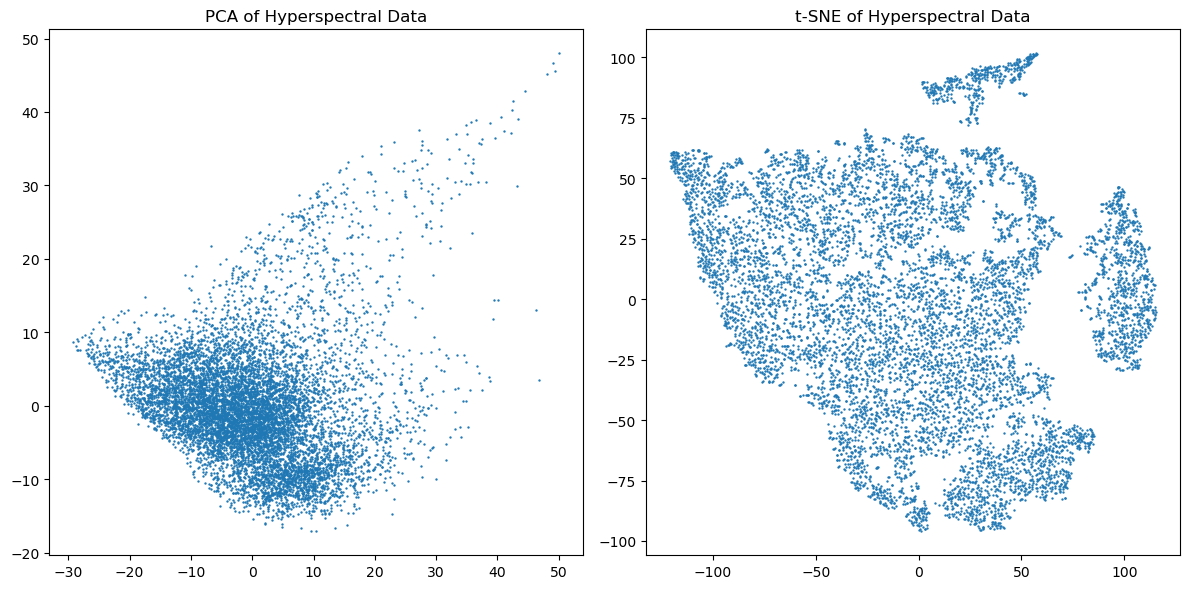

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# Import spectral is still needed if you plan to use other spectral functions,
# but not for simply loading the .npy file.
import spectral

# Load UAV dataset using numpy.load for .npy file
def load_UAV():
    # Use numpy.load to load the .npy file
    img = np.load(r'C:\Users\raaya\Downloads\Test\rs\MJK_N_patch_101_10_1.npy')
    return img

# Flatten the hyperspectral cube to 2D (samples x bands)
def reshape_cube(cube):
    h, w, bands = cube.shape
    flat = cube.reshape(-1, bands)
    return flat

# Main function
def main():
    # Load data
    cube = load_UAV()
    print("Original cube shape:", cube.shape)

    # Reshape and normalize
    data = reshape_cube(cube)
    print("Reshaped data shape:", data.shape)
    data = StandardScaler().fit_transform(data)

    # Remove zero-variance pixels (often background)
    # Ensure that after scaling, zero-variance rows are removed if necessary.
    # The original condition `data == 0` after scaling might not accurately
    # capture the background. A better approach might be to mask based on
    # the original data before scaling or use a threshold on the scaled data
    # if appropriate for the dataset. For this example, keeping the original
    # logic but being mindful it might remove more than just the background.
    data = data[~np.all(data == 0, axis=1)]


    # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    print("PCA done")

    # t-SNE
    # Increase n_iter for potentially better convergence, especially for larger datasets.
    tsne = TSNE(n_components=2, perplexity=30, max_iter=3000, random_state=42, init='pca', learning_rate='auto')
    tsne_result = tsne.fit_transform(data)
    print("t-SNE done")

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # For scatter plots, using a colormap with s=0.5 might not be effective
    # for visualizing structure without color mapping to a specific variable.
    # Removing cmap if no variable is mapped to color.
    ax[0].scatter(pca_result[:, 0], pca_result[:, 1], s=0.5)
    ax[0].set_title("PCA of Hyperspectral Data")

    ax[1].scatter(tsne_result[:, 0], tsne_result[:, 1], s=0.5)
    ax[1].set_title("t-SNE of Hyperspectral Data")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Data cube shape: (96, 96, 200)
Ground truth shape: (96, 96)
Filtered data shape: (9216, 200)


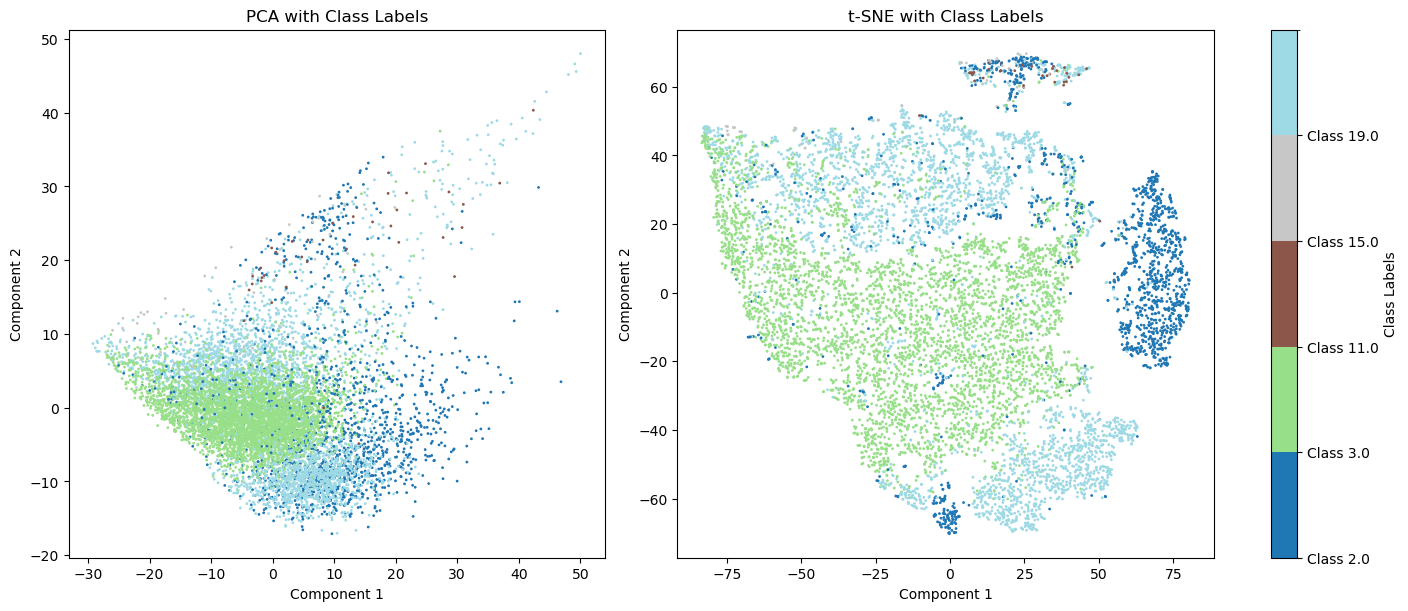

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as mcolors
import os

# Load .npy hyperspectral data and labels
def load_npy_data(data_path=r'C:\Users\raaya\Downloads\Test\rs\MJK_N_patch_101_10_1.npy',
                  label_path=r'C:\Users\raaya\Downloads\Test\gt\MJK_N_patch_101_10_1.npy'):
    if not os.path.exists(data_path) or not os.path.exists(label_path):
        raise FileNotFoundError("Ensure both .npy files exist in the current directory.")
    
    cube = np.load(data_path)  # shape: (H, W, B)
    labels = np.load(label_path)  # shape: (H, W)
    return cube, labels

# Flatten and preprocess data
def reshape_and_filter_data(cube, labels):
    h, w, b = cube.shape
    data = cube.reshape(-1, b)
    flat_labels = labels.reshape(-1)

    # Remove background pixels (label = 0)
    mask = flat_labels != 0
    data = data[mask]
    flat_labels = flat_labels[mask]

    # Normalize
    data = StandardScaler().fit_transform(data)

    return data, flat_labels

# Plot embeddings with color map
def plot_embedding(embedding, labels, title, ax, cmap, norm):
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, s=1, cmap=cmap, norm=norm)
    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    return scatter

cube, labels = load_npy_data()
print("Data cube shape:", cube.shape)
print("Ground truth shape:", labels.shape)

    # Reshape and filter
data, flat_labels = reshape_and_filter_data(cube, labels)
print("Filtered data shape:", data.shape)

    # Dimensionality Reduction
pca_result = PCA(n_components=2).fit_transform(data)
tsne_result = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42).fit_transform(data)

    # Create color map
# Create color map and normalization based on actual class labels
classes = np.unique(flat_labels)
num_classes = len(classes)

# Remap original labels to 0-based indices for plotting
label_map = {val: idx for idx, val in enumerate(classes)}
remapped_labels = np.array([label_map[l] for l in flat_labels])

# Create discrete color map
base_cmap = plt.colormaps.get_cmap('tab20')
cmap = mcolors.ListedColormap(base_cmap(np.linspace(0, 1, num_classes)))
norm = mcolors.BoundaryNorm(boundaries=np.arange(num_classes + 1), ncolors=num_classes)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

plot_embedding(pca_result, remapped_labels, "PCA with Class Labels", ax[0], cmap, norm)
scatter = plot_embedding(tsne_result, remapped_labels, "t-SNE with Class Labels", ax[1], cmap, norm)

# Colorbar with correct labels
cbar = fig.colorbar(scatter, ax=ax, ticks=np.arange(num_classes))
cbar.ax.set_yticklabels([f'Class {c}' for c in classes])
cbar.set_label("Class Labels")

plt.show()

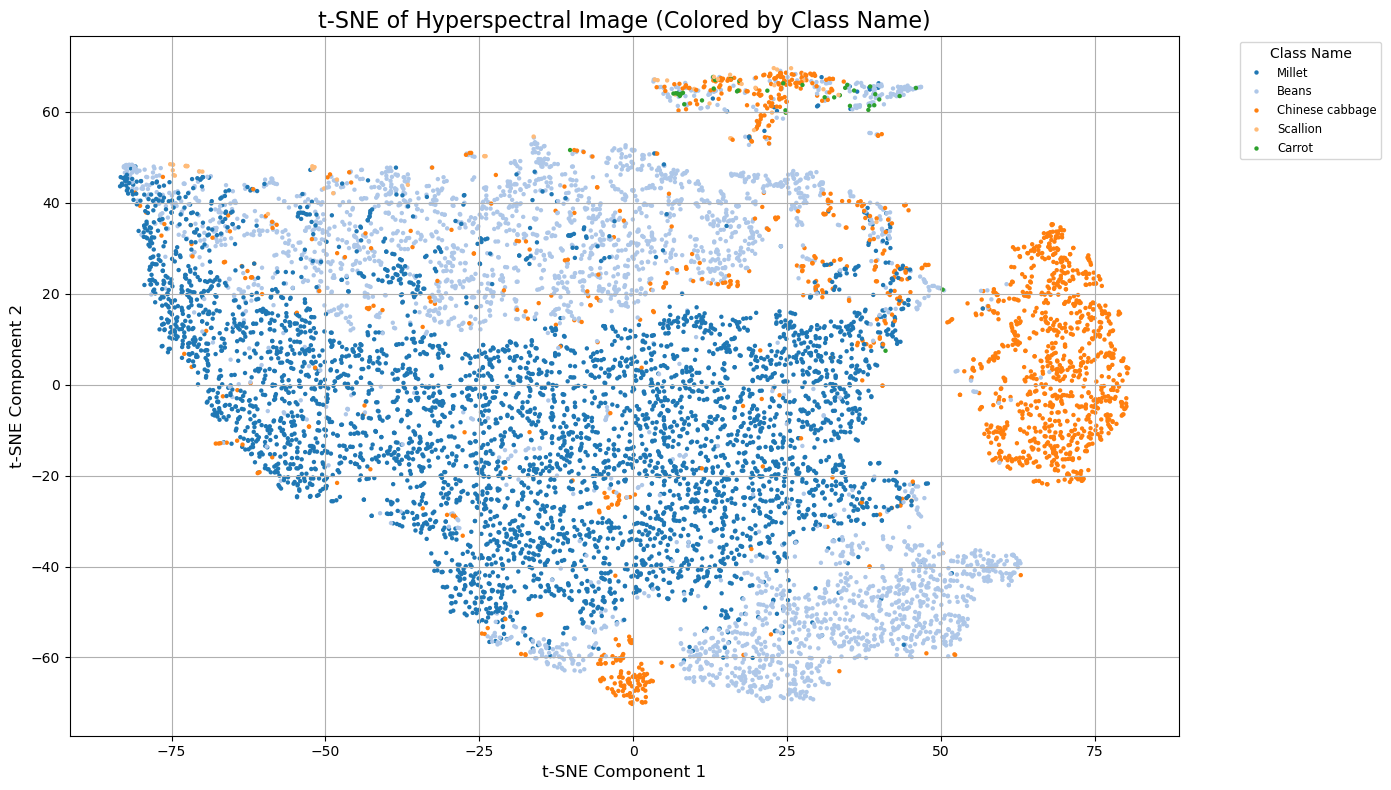

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd

# === Class ID to Name Mapping ===
class_id_to_name = {
    0: 'NULL',
    1: 'Bare soil & Weed',
    2: 'Chinese cabbage',
    3: 'Millet',
    4: 'Leaf mustard',
    5: 'Green bean',
    6: 'Spinach',
    7: 'Bok Choy',
    8: 'Turnip',
    9: 'Cotton',
    10: 'Corn',
    11: 'Carrot',
    12: 'Sorghum',
    13: 'Pumpkin',
    14: 'Kohlrabi',
    15: 'Scallion',
    16: 'Sweet potato',
    17: 'Peanut',
    18: 'Sesame',
    19: 'Beans',
    20: 'Road',
    21: 'Tobacco',
    22: 'Holly',
    23: 'Cauliflower',
    24: 'Eggplant',
    25: 'Daikon',
    26: 'Sichuan Peppercorn',
    27: 'Mulched field',
    28: 'Tree',
    29: 'Okra'
}

# === Filter out background and map class labels to names ===
nonzero_labels = flat_labels  # Already filtered in earlier step
class_names = [class_id_to_name[l] for l in nonzero_labels]

# === Prepare DataFrame for plotting ===
df = pd.DataFrame({
    'TSNE1': tsne_result[:, 0],
    'TSNE2': tsne_result[:, 1],
    'Class': class_names
})

# === Plot with class names ===
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='Class',
                palette='tab20', s=10, linewidth=0, legend='full')

plt.title('t-SNE of Hyperspectral Image (Colored by Class Name)', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Class Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='medium')
plt.tight_layout()
plt.grid(True)
plt.show()


In [8]:
import numpy as np

#VCA function
def vca(Y, num_components, patch_shape):
    import numpy.linalg as la

    L, N = Y.shape
    R = num_components

    mean_Y = np.mean(Y, axis=1, keepdims=True)
    Y0 = Y - mean_Y

    Ud, _, _ = np.linalg.svd(Y0 @ Y0.T / N)
    Ud = Ud[:, :R]
    x_p = Ud.T @ Y0

    x_p += 1e-6 * np.random.randn(*x_p.shape)

    A = np.zeros((R, R))
    A[-1, :] = 1
    M = np.zeros((L, R))
    indices = []

    used_indices = set()
    np.random.seed(0)  # Set seed once outside loop to force for same endmember to be generated

    for i in range(R):
        w = np.random.randn(R, 1)
        f = w - A.T @ np.linalg.pinv(A @ A.T) @ A @ w
        f = f / np.linalg.norm(f)
        v = f.T @ x_p

        # Exclude previously selected indices by zeroing them out
        v[0, list(used_indices)] = 0

        idx = np.argmax(np.abs(v))
        used_indices.add(idx)

        M[:, i] = Y[:, idx]
        A[:, i] = x_p[:, idx]
        indices.append(idx)

    # Convert 1D indices to 2D (row, col)
    h, w = patch_shape
    locations = [(idx // w, idx % w) for idx in indices]

    return M, locations

In [9]:
# Load data and GT class map
rs = np.load(r'C:\Users\raaya\Downloads\Test\rs\MJK_N_patch_101_10_1.npy')
h, w, bands = rs.shape
pixels = rs.reshape(-1, bands).T  # shape: (bands, pixels)

class_map = np.load(r'C:\Users\raaya\Downloads\Test\gt\MJK_N_patch_101_10_1.npy')  # shape: (h, w)

# Run VCA
num_endmembers = 8
endmembers, locations = vca(pixels, num_endmembers, patch_shape=(h, w))

# Print endmember info
for i, (row, col) in enumerate(locations):
    class_label = class_map[row, col]
    class_name = class_id_to_name.get(int(class_label), "Unknown")
    print(f"Endmember {i+1} at (row={row}, col={col}) belongs to class {class_label} ({class_name})")


Endmember 1 at (row=45, col=13) belongs to class 2.0 (Chinese cabbage)
Endmember 2 at (row=10, col=53) belongs to class 19.0 (Beans)
Endmember 3 at (row=19, col=27) belongs to class 2.0 (Chinese cabbage)
Endmember 4 at (row=8, col=57) belongs to class 19.0 (Beans)
Endmember 5 at (row=54, col=61) belongs to class 3.0 (Millet)
Endmember 6 at (row=52, col=9) belongs to class 2.0 (Chinese cabbage)
Endmember 7 at (row=2, col=67) belongs to class 3.0 (Millet)
Endmember 8 at (row=10, col=49) belongs to class 19.0 (Beans)


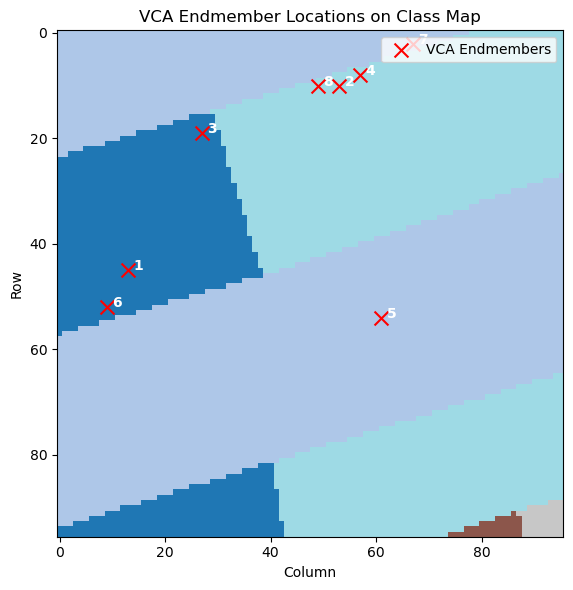

In [18]:
import matplotlib.pyplot as plt

# === Plot the ground truth class map with VCA endmember locations overlayed ===
plt.figure(figsize=(8, 6))

# Show class map (you could also use np.mean(rs, axis=2) for grayscale background)
plt.imshow(class_map, cmap='tab20', interpolation='none')
plt.title("VCA Endmember Locations on Class Map")
plt.xlabel("Column")
plt.ylabel("Row")

# Extract rows and cols for plotting
rows, cols = zip(*locations)

# Scatter the endmember locations
plt.scatter(cols, rows, c='red', marker='x', s=100, label='VCA Endmembers')

# Annotate with endmember numbers
for i, (r, c) in enumerate(locations):
    plt.text(c + 1, r, f'{i+1}', color='white', fontsize=10, weight='bold')

plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
from scipy.optimize import minimize, nnls
from numpy.linalg import lstsq

#FCLS function
def fcls(A, y, x0=None, lambda_reg=1e-4):
    n = A.shape[1]
    if x0 is None:
        x0 = np.ones(n) / n  # uniform initial guess

    def objective(x):
        return np.linalg.norm(A @ x - y)**2 + lambda_reg * np.linalg.norm(x)**2

    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # sum-to-one
        {'type': 'ineq', 'fun': lambda x: x}             # non-negativity
    ]

    result = minimize(objective, x0, method='SLSQP', constraints=constraints,
                      options={'maxiter': 1000, 'ftol': 1e-9})

    if result.success:
        x = result.x
        x[x < 0] = 0
        return x
    else:
        return np.zeros(n)

# Prepare containers
uls_map = []
nnls_map = []
fcls_map = []

print("pixels shape:", pixels.shape)
print("endmembers shape:", endmembers.shape)

for idx, px in enumerate(pixels.T):
    try:
        uls_abund, _, _, _ = lstsq(endmembers, px, rcond=None)
        nnls_abund, _ = nnls(endmembers, px)
        fcls_abund = fcls(endmembers, px)  # uniform initial guess inside fcls

        # Shape validation
        if (
            uls_abund.shape[0] == endmembers.shape[1] and
            nnls_abund.shape[0] == endmembers.shape[1] and
            fcls_abund.shape[0] == endmembers.shape[1]
        ):
            uls_map.append(uls_abund)
            nnls_map.append(nnls_abund)
            fcls_map.append(fcls_abund)
        else:
            print(f"Shape mismatch at pixel {idx}")

    except Exception as e:
        print(f"Error at pixel {idx}: {e}")

# Reshape abundance maps to spatial shape (adjust 96,96 if needed)
uls_map = np.array(uls_map).reshape(96, 96, -1)
nnls_map = np.array(nnls_map).reshape(96, 96, -1)
fcls_map = np.array(fcls_map).reshape(96, 96, -1)


pixels shape: (200, 9216)
endmembers shape: (200, 8)


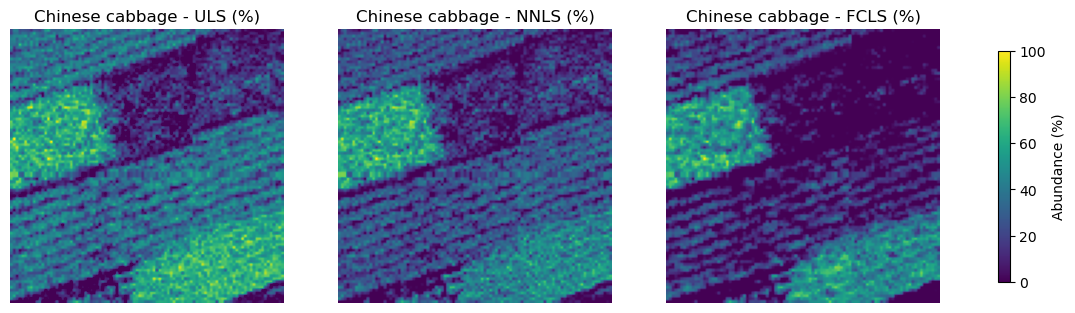

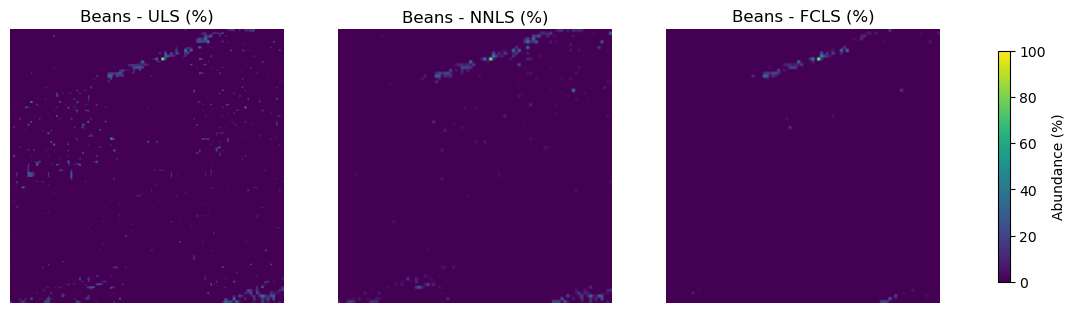

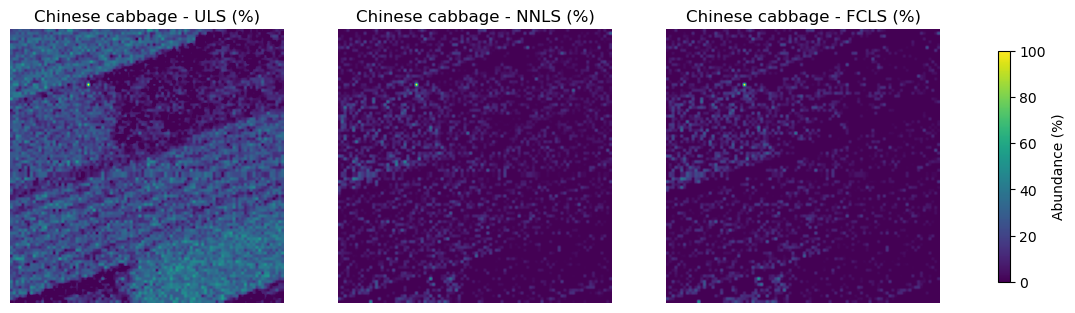

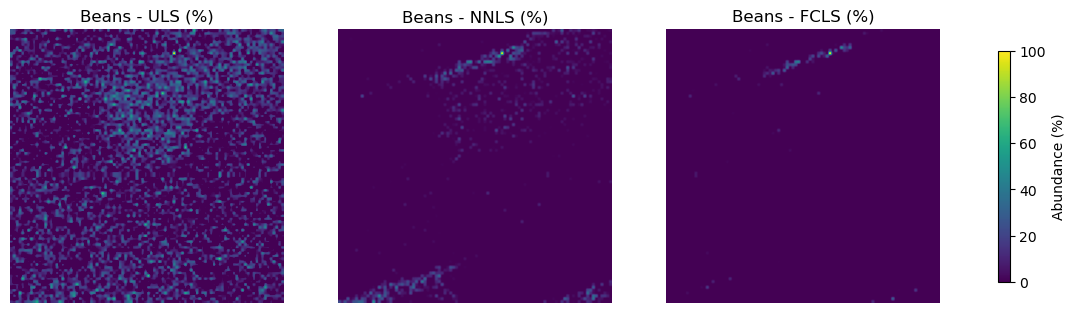

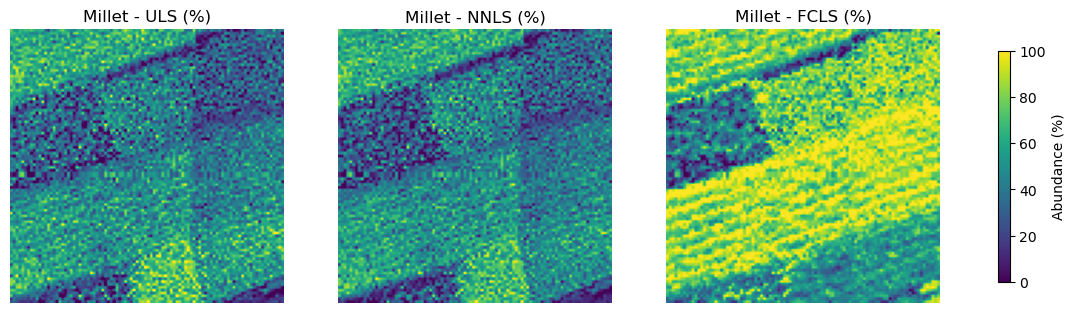

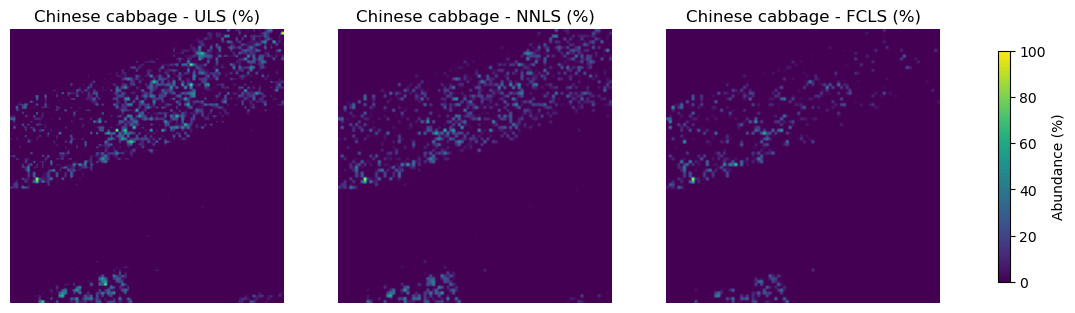

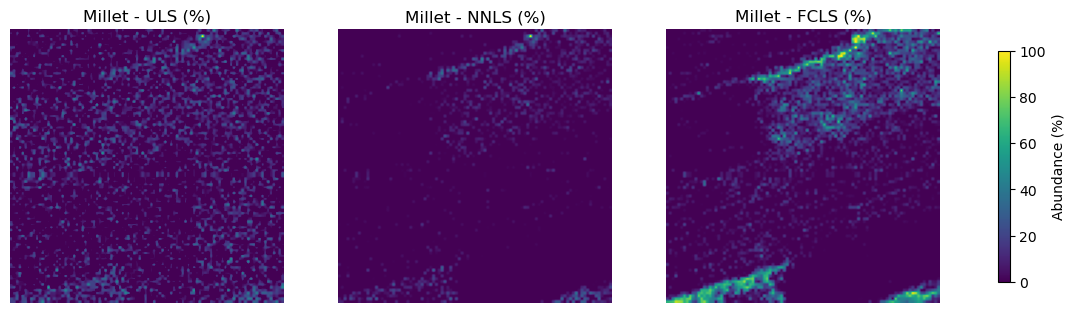

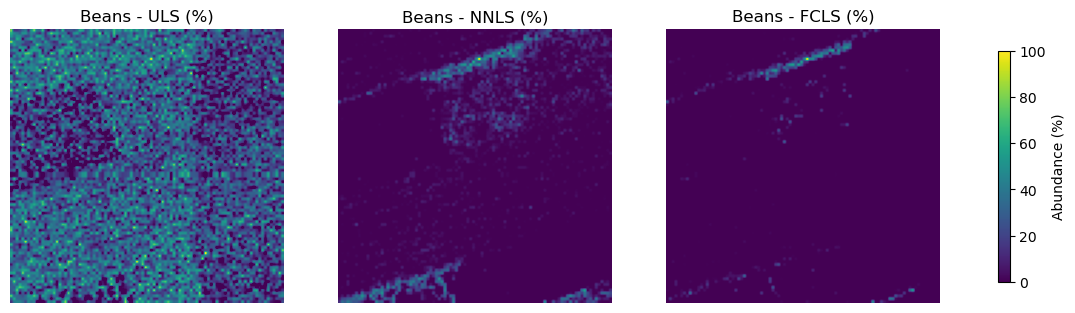

In [11]:

# Convert abundance maps to percentage scale [0,100] for better interpretability
uls_map_percent = uls_map * 100
nnls_map_percent = nnls_map * 100
fcls_map_percent = fcls_map * 100

# Loop through each endmember to visualize its abundance map from all three methods side-by-side
for i in range(num_endmembers):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Get class label and name for the current endmember
    row, col = locations[i]
    class_label = int(class_map[row, col])
    class_name = class_id_to_name.get(class_label, "Unknown")

    # Plot ULS
    axes[0].imshow(uls_map_percent[:, :, i], cmap='viridis', vmin=0, vmax=100)
    axes[0].set_title(f"{class_name} - ULS (%)")
    axes[0].axis('off')

    # Plot NNLS
    axes[1].imshow(nnls_map_percent[:, :, i], cmap='viridis', vmin=0, vmax=100)
    axes[1].set_title(f"{class_name} - NNLS (%)")
    axes[1].axis('off')

    # Plot FCLS
    axes[2].imshow(fcls_map_percent[:, :, i], cmap='viridis', vmin=0, vmax=100)
    axes[2].set_title(f"{class_name} - FCLS (%)")
    axes[2].axis('off')

    # Colorbar
    fig.colorbar(axes[2].images[0], ax=axes.ravel().tolist(), shrink=0.6, label='Abundance (%)')
    plt.show()



In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define SUnSAL with ADMM 
def sunsal_admm(A, y, lambda_=0.01, max_iter=1000, tol=1e-4, positivity=True, sum_to_one=True):
    m, n = A.shape
    AT = A.T
    ATA = AT @ A
    ATy = AT @ y
    I = np.eye(n)

    # Initialize ADMM variables
    x = np.zeros(n)
    z = np.zeros(n)
    u = np.zeros(n)

    rho = 0.01
    inv_mat = np.linalg.inv(ATA + rho * I)

    for k in range(max_iter):
        # x-update
        x = inv_mat @ (ATy + rho * (z - u))

        # z-update with soft-thresholding
        z_old = z.copy()
        z = x + u
        z = np.sign(z) * np.maximum(np.abs(z) - lambda_ / rho, 0)

        if positivity:
            z = np.maximum(z, 0)

        if sum_to_one:
            sum_z = np.sum(z)
            if sum_z > 0:
                z = z / sum_z

        # u-update
        u = u + (x - z)

        # Check convergence
        if np.linalg.norm(x - z) < tol and np.linalg.norm(z - z_old) < tol:
            break

    return z



In [13]:
A = endmembers
print("Endmembers shape:", A.shape)

# Unmix all pixels 
sunsal_map = []

for i, px in enumerate(pixels.T):
    abund = sunsal_admm(A, px, lambda_=0.01, positivity=True, sum_to_one=True)
    sunsal_map.append(abund)

sunsal_map = np.array(sunsal_map).reshape(96, 96, -1)  # adjust size if needed
print("SUnSAL abundance map shape:", sunsal_map.shape)

Endmembers shape: (200, 8)
SUnSAL abundance map shape: (96, 96, 8)


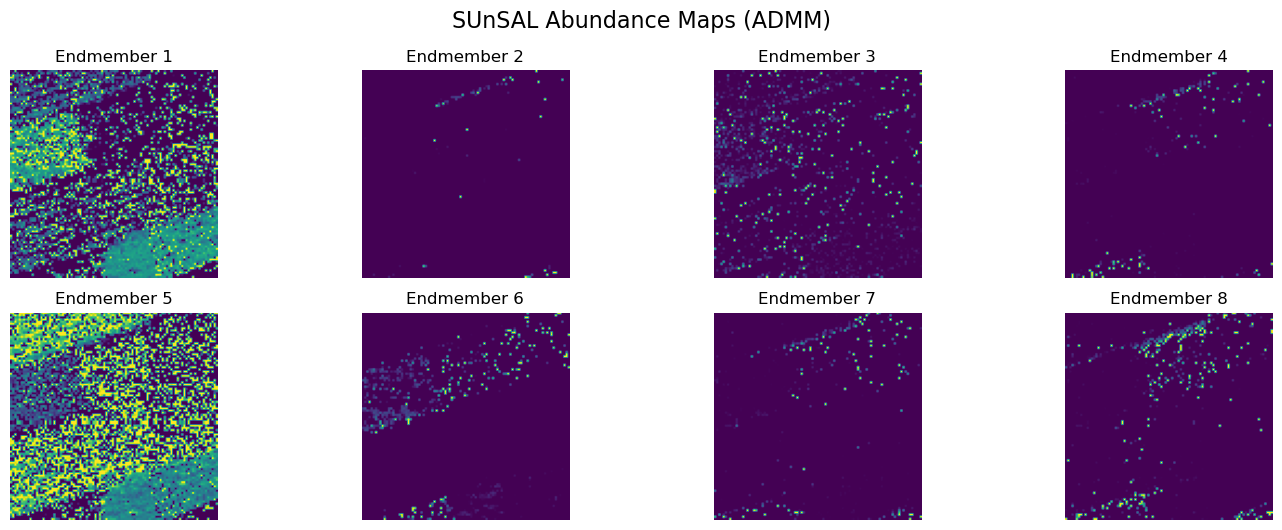

In [14]:
# Plot abundance maps
n_endmembers = sunsal_map.shape[2]

plt.figure(figsize=(15, 5))

for i in range(n_endmembers):
    plt.subplot(2, (n_endmembers + 1) // 2, i + 1)
    plt.imshow(sunsal_map[:, :, i], cmap='viridis')
    plt.title(f'Endmember {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.suptitle("SUnSAL Abundance Maps (ADMM)", fontsize=16, y=1.05)
plt.show()


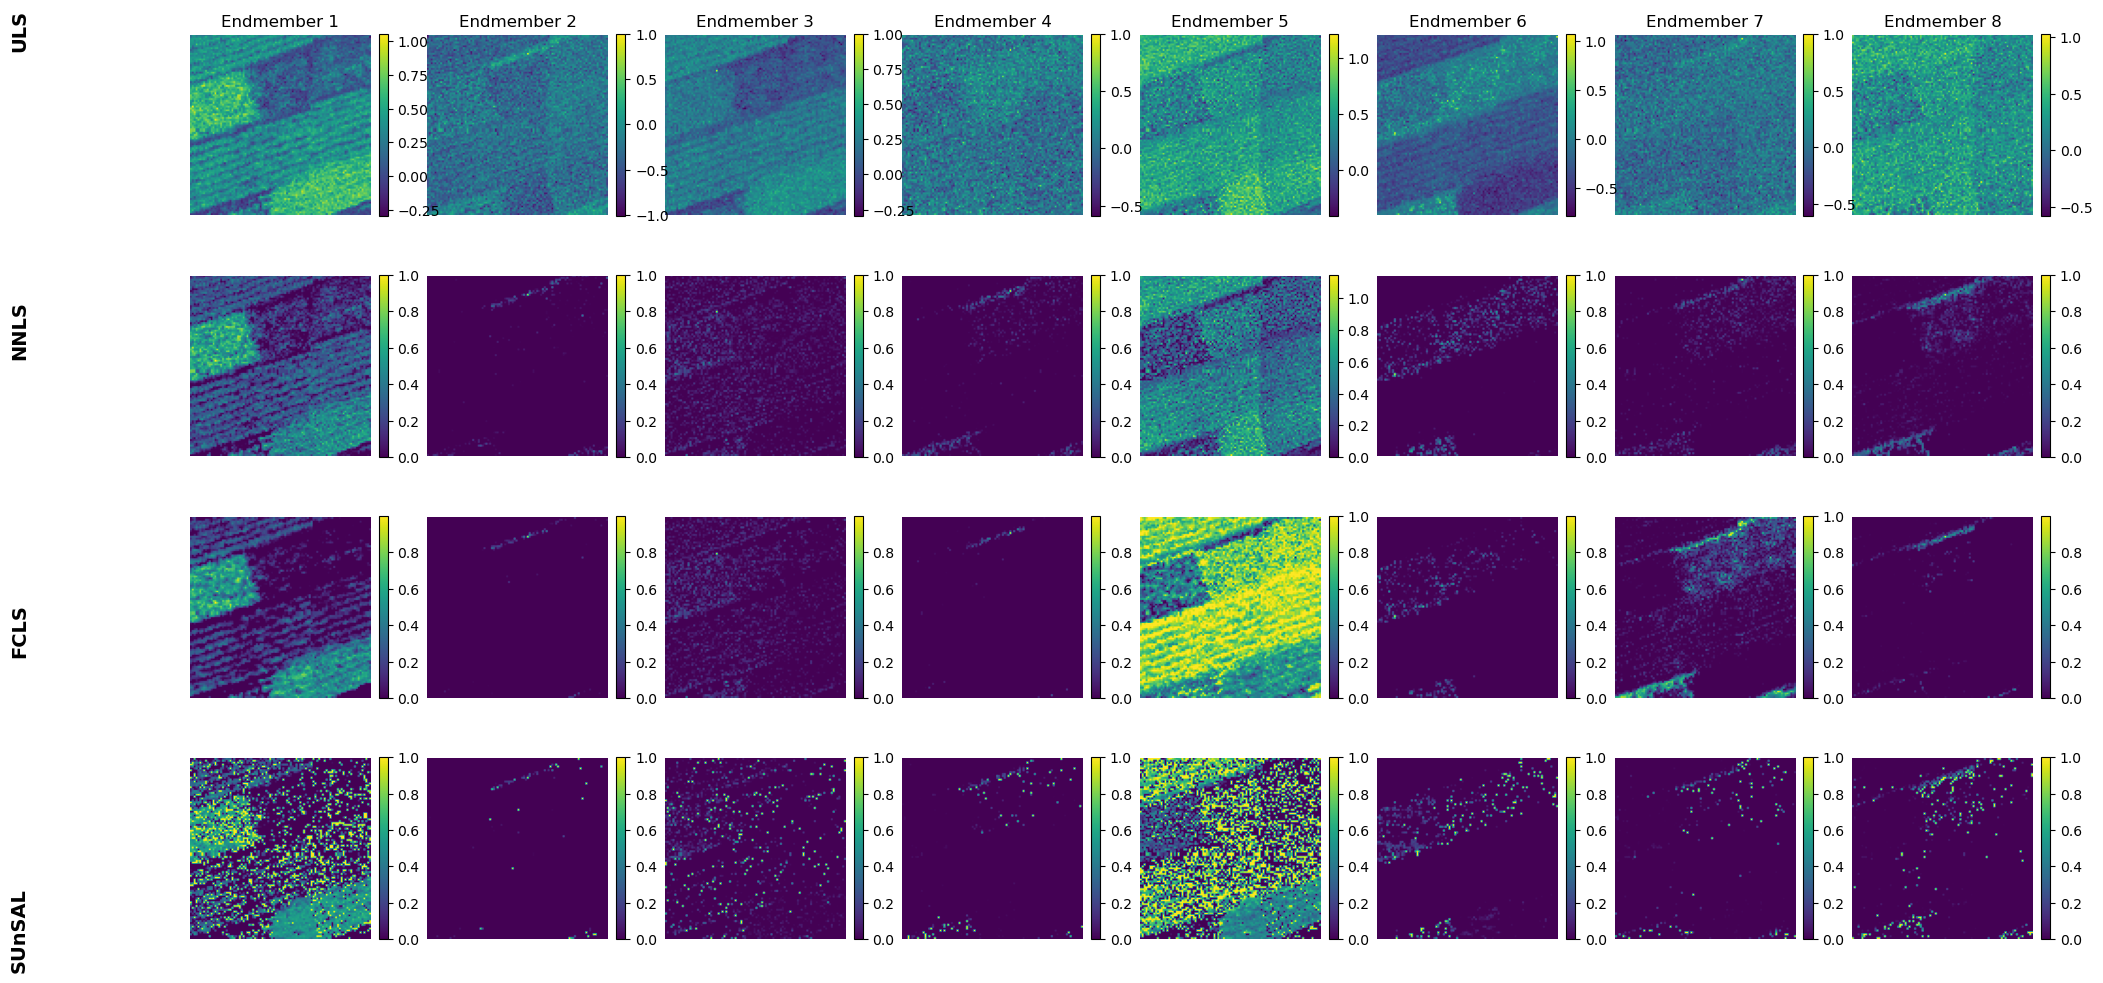

In [15]:
import matplotlib.pyplot as plt

methods = {
    "ULS": uls_map,
    "NNLS": nnls_map,
    "FCLS": fcls_map,
    "SUnSAL": sunsal_map
}

n_methods = len(methods)
n_endmembers = sunsal_map.shape[2]  # assuming all maps have same shape
fig, axes = plt.subplots(n_methods, n_endmembers, figsize=(3 * n_endmembers, 3 * n_methods))

for row_idx, (method_name, abundance_map) in enumerate(methods.items()):
    # Add a big row label on the left side for method names
    fig.text(0.05, 1 - (row_idx + 0.5) / n_methods, method_name, fontsize=14, fontweight='bold', va='center', rotation='vertical')
    
    for col_idx in range(n_endmembers):
        ax = axes[row_idx, col_idx] if n_endmembers > 1 else axes[row_idx]
        im = ax.imshow(abundance_map[:, :, col_idx], cmap='viridis')
        if row_idx == 0:
            ax.set_title(f"Endmember {col_idx + 1}", fontsize=12)
        ax.axis('off')
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)



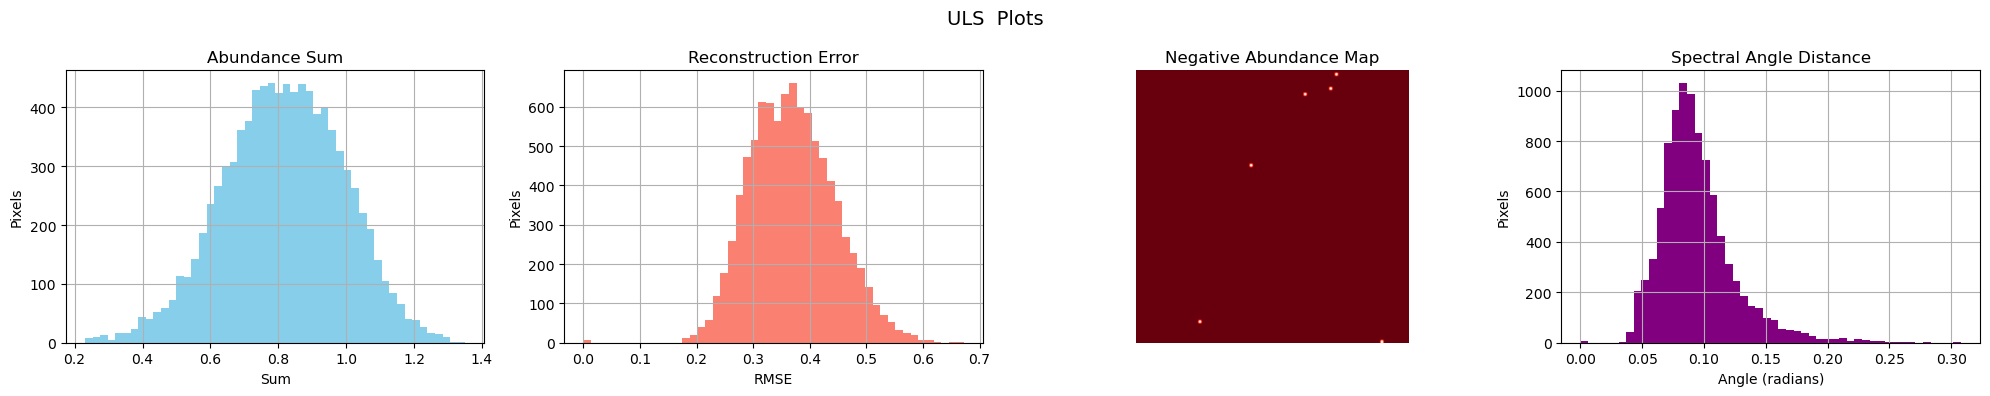

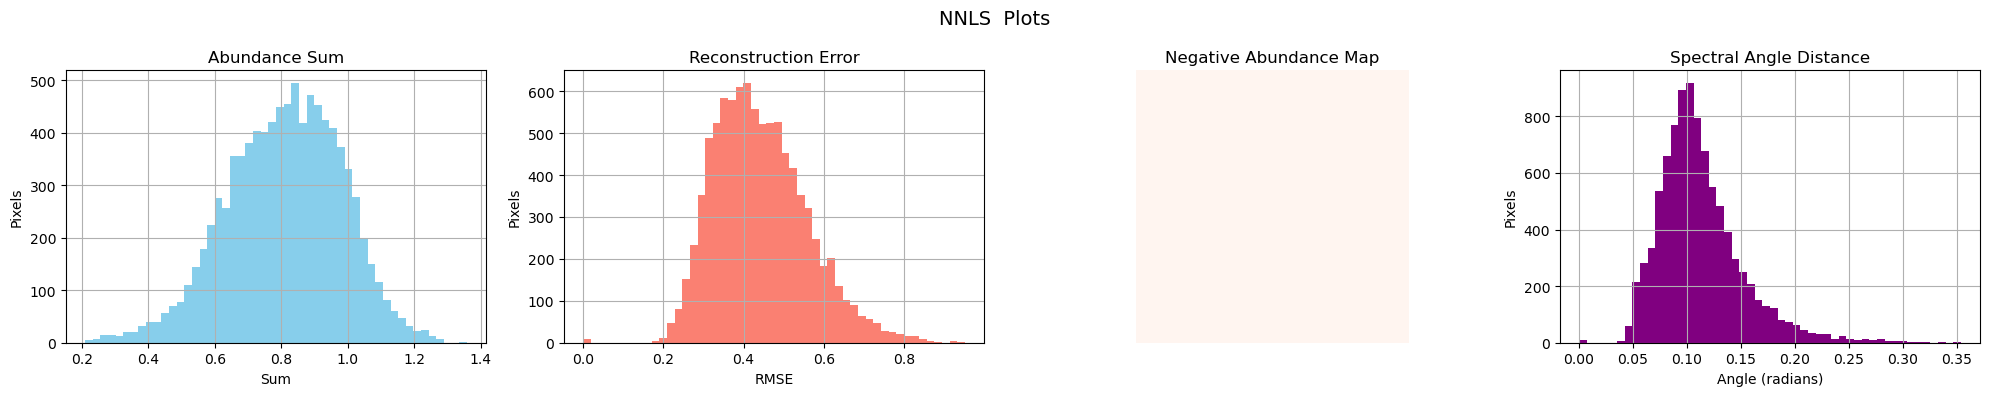

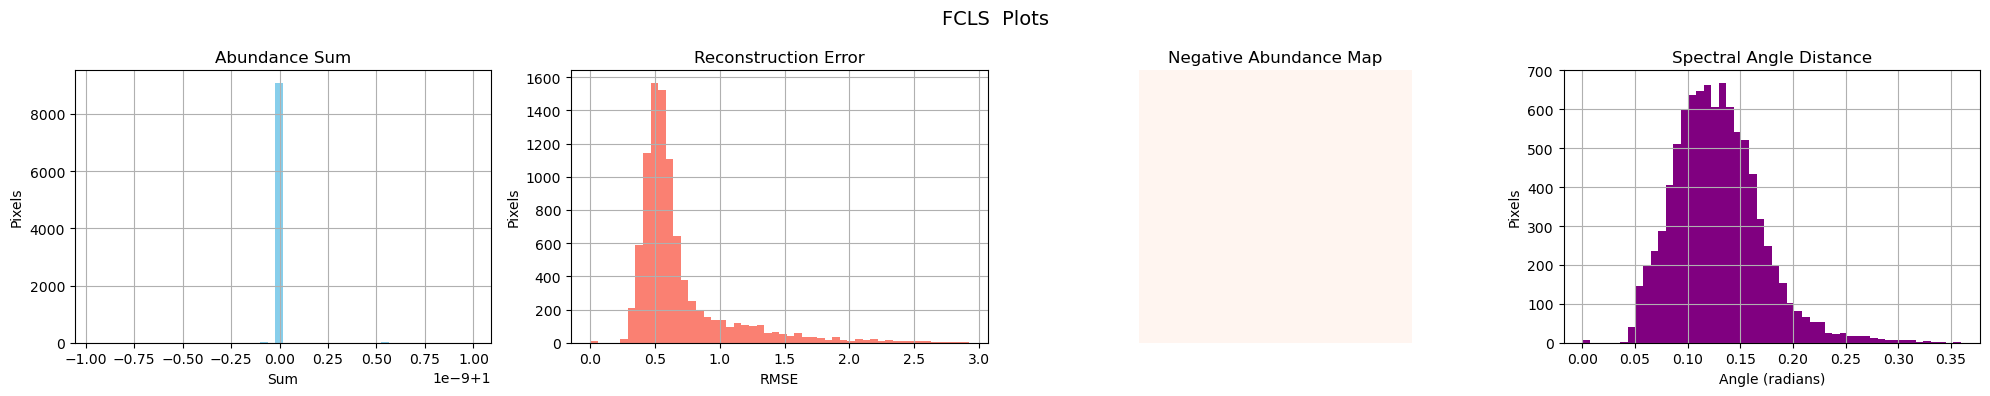


=== Summary Table ===
        sum_min  sum_max  sum_mean  neg_count  neg_pixels  sparsity_percent  \
method                                                                        
ULS      0.2302   1.3513    0.8156      27094        9210            0.0014   
NNLS     0.2090   1.3579    0.8093          0           0           62.3074   
FCLS     1.0000   1.0000    1.0000          0           0           34.1417   

        recon_error_mean  recon_error_min  recon_error_max  SAD_mean  SAD_min  \
method                                                                          
ULS               0.3693           0.0000           0.6725    0.0943      0.0   
NNLS              0.4424           0.0000           0.9512    0.1125      0.0   
FCLS              0.6869           0.0001           2.9177    0.1283      0.0   

        SAD_max  
method           
ULS      0.3079  
NNLS     0.3540  
FCLS     0.3595  


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#  Spectral Angle Distance (SAD) 
def spectral_angle_distance(x, y):
    numerator = np.dot(x, y)
    denominator = np.linalg.norm(x) * np.linalg.norm(y)
    if denominator == 0:
        return 0.0
    return np.arccos(np.clip(numerator / denominator, -1, 1))

# Combined Evaluation and Plotting 
def evaluate_and_plot_method(endmembers, pixels, abundance_map, method_name="Method"):
    h, w, n_endmembers = abundance_map.shape
    abundances = abundance_map.reshape(-1, n_endmembers)
    pixels_reshaped = pixels.T

    # Quantitative Metrics
    sums = np.sum(abundances, axis=1)
    sum_min, sum_max, sum_mean = np.min(sums), np.max(sums), np.mean(sums)

    neg_count = np.sum(abundances < 0)
    neg_pixels = np.sum(np.any(abundances < 0, axis=1))

    zero_abundances = np.sum(abundances == 0)
    sparsity = zero_abundances / abundances.size * 100

    errors = np.linalg.norm(endmembers @ abundances.T - pixels_reshaped.T, axis=0)
    error_mean, error_min, error_max = np.mean(errors), np.min(errors), np.max(errors)

    recon = endmembers @ abundances.T
    sads = [spectral_angle_distance(pixels_reshaped[i], recon[:, i]) for i in range(recon.shape[1])]
    sads = np.array(sads)
    sad_mean, sad_min, sad_max = np.mean(sads), np.min(sads), np.max(sads)

    # Plotting all graphs in one row
    fig, axes = plt.subplots(1, 4, figsize=(20, 4))
    fig.suptitle(f"{method_name}  Plots", fontsize=14)

    # 1. Histogram of abundance sums
    axes[0].hist(sums, bins=50, color='skyblue')
    axes[0].set_title("Abundance Sum")
    axes[0].set_xlabel("Sum")
    axes[0].set_ylabel("Pixels")
    axes[0].grid(True)

    # 2. Reconstruction Error
    axes[1].hist(errors, bins=50, color='salmon')
    axes[1].set_title("Reconstruction Error")
    axes[1].set_xlabel("RMSE")
    axes[1].set_ylabel("Pixels")
    axes[1].grid(True)

    # 3. Negative Abundance Map
    neg_map = (abundance_map < 0).any(axis=2)
    axes[2].imshow(neg_map, cmap='Reds')
    axes[2].set_title("Negative Abundance Map")
    axes[2].axis("off")

    # 4. SAD Histogram
    axes[3].hist(sads, bins=50, color='purple')
    axes[3].set_title("Spectral Angle Distance")
    axes[3].set_xlabel("Angle (radians)")
    axes[3].set_ylabel("Pixels")
    axes[3].grid(True)

    plt.tight_layout()
    plt.show()

    # Return metrics
    return {
        "method": method_name,
        "sum_min": sum_min, "sum_max": sum_max, "sum_mean": sum_mean,
        "neg_count": neg_count, "neg_pixels": neg_pixels, "sparsity_percent": sparsity,
        "recon_error_mean": error_mean, "recon_error_min": error_min, "recon_error_max": error_max,
        "SAD_mean": sad_mean, "SAD_min": sad_min, "SAD_max": sad_max
    }

#  Main Evaluation Loop 
results_list = []
for method_name, abundance_map in zip(["ULS", "NNLS", "FCLS"], [uls_map, nnls_map, fcls_map]):
    metrics = evaluate_and_plot_method(endmembers, pixels, abundance_map, method_name)
    results_list.append(metrics)

# Final Summary Table 
results_df = pd.DataFrame(results_list)
results_df = results_df.set_index("method")
print("\n=== Summary Table ===")
print(results_df.round(4))


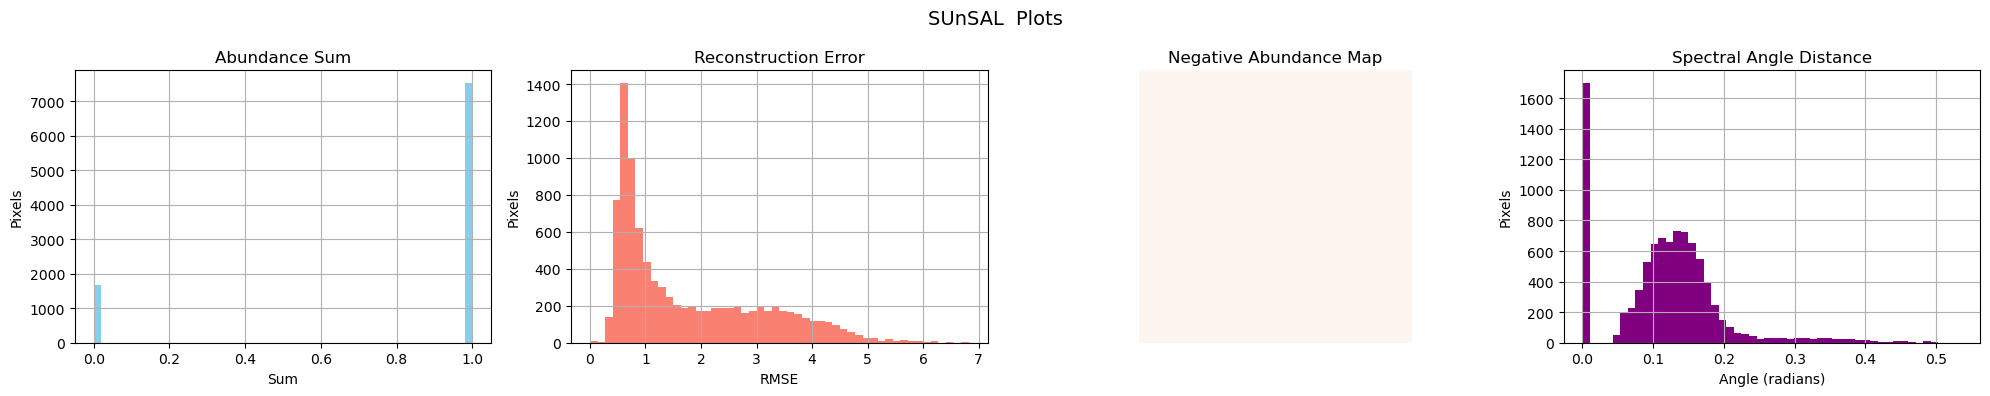


=== Final Summary Table (Including SUnSAL) ===
        sum_min  sum_max  sum_mean  neg_count  neg_pixels  sparsity_percent  \
method                                                                        
ULS      0.2302   1.3513    0.8156      27094        9210            0.0014   
NNLS     0.2090   1.3579    0.8093          0           0           62.3074   
FCLS     1.0000   1.0000    1.0000          0           0           34.1417   
SUnSAL   0.0000   1.0000    0.8167          0           0           81.6461   

        recon_error_mean  recon_error_min  recon_error_max  SAD_mean  SAD_min  \
method                                                                          
ULS               0.3693           0.0000           0.6725    0.0943      0.0   
NNLS              0.4424           0.0000           0.9512    0.1125      0.0   
FCLS              0.6869           0.0001           2.9177    0.1283      0.0   
SUnSAL            1.7564           0.0000           6.8176    0.1175    

In [17]:
# Evaluate SUnSAL 
sunsal_metrics = evaluate_and_plot_method(endmembers, pixels, sunsal_map, method_name="SUnSAL")
results_list.append(sunsal_metrics)

# Combined Summary Table 
results_df = pd.DataFrame(results_list)
results_df = results_df.set_index("method")

print("\n=== Final Summary Table (Including SUnSAL) ===")
print(results_df.round(4))
